## R exam answers

In [2]:
# Load the files
GDP = read.csv('GDP.csv')
HDI = read.csv('HDI.csv')

# Analyze files with head() and str()
head(GDP)
head(HDI)
str(GDP)
str(HDI)

,Province,GDP.per.capita,CCAA
,<chr>,<dbl>,<chr>
1,Almería,20.873,Andalucía y Extremadura
2,Cádiz,18.029,Andalucía y Extremadura
3,Córdoba,17.292,Andalucía y Extremadura
4,Granada,17.167,Andalucía y Extremadura
5,Huelva,18.207,Andalucía y Extremadura
6,Jaén,16.433,Andalucía y Extremadura


,Province,HDI
,<chr>,<dbl>
1,Cádiz,0.913
2,Almería,0.915
3,Jaén,0.915
4,Huelva,0.917
5,Badajoz,0.919
6,Córdoba,0.920


'data.frame':	50 obs. of  3 variables:
 $ Province      : chr  "Almería" "Cádiz" "Córdoba" "Granada" ...
 $ GDP.per.capita: num  20.9 18 17.3 17.2 18.2 ...
 $ CCAA          : chr  "Andalucía y Extremadura" "Andalucía y Extremadura" "Andalucía y Extremadura" "Andalucía y Extremadura" ...
'data.frame':	50 obs. of  2 variables:
 $ Province: chr  "Cádiz" "Almería" "Jaén" "Huelva" ...
 $ HDI     : num  0.913 0.915 0.915 0.917 0.919 0.92 0.92 0.921 0.923 0.924 ...


In [3]:
# Order and bind the data frames
GDP = GDP[order(GDP$Province),]
HDI = HDI[order(HDI$Province),]
joined = cbind(GDP, HDI)

# Remove one of the Province columns
joined = subset(joined, select = -c(Province)) # The data frame looks ok, 50 obs. of 4 variables

In [4]:
# Check if everything is ok
head(joined)
tail(joined)
str(joined)

,GDP.per.capita,CCAA,Province,HDI
,<dbl>,<chr>,<chr>,<dbl>
48,36.055,País Vasco Navarra y Rioja,Álava,0.990
26,17.864,Castilla-La Mancha,Albacete,0.933
34,19.201,Comunitat Valenciana y Murcia,Alicante,0.930
1,20.873,Andalucía y Extremadura,Almería,0.915
12,21.634,Asturias y Cantabria,Asturias,0.956
16,18.382,Castilla y León,Ávila,0.952


,GDP.per.capita,CCAA,Province,HDI
,<dbl>,<chr>,<chr>,<dbl>
29,19.251,Castilla-La Mancha,Toledo,0.933
36,22.538,Comunitat Valenciana y Murcia,Valencia,0.946
24,23.947,Castilla y León,Valladolid,0.978
50,27.705,País Vasco Navarra y Rioja,Vizcaya,0.988
25,17.952,Castilla y León,Zamora,0.959
11,26.082,Aragon,Zaragoza,0.968


'data.frame':	50 obs. of  4 variables:
 $ GDP.per.capita: num  36.1 17.9 19.2 20.9 21.6 ...
 $ CCAA          : chr  "País Vasco Navarra y Rioja" "Castilla-La Mancha" "Comunitat Valenciana y Murcia" "Andalucía y Extremadura" ...
 $ Province      : chr  "Álava" "Albacete" "Alicante" "Almería" ...
 $ HDI           : num  0.99 0.933 0.93 0.915 0.956 0.952 0.919 0.962 0.972 0.924 ...


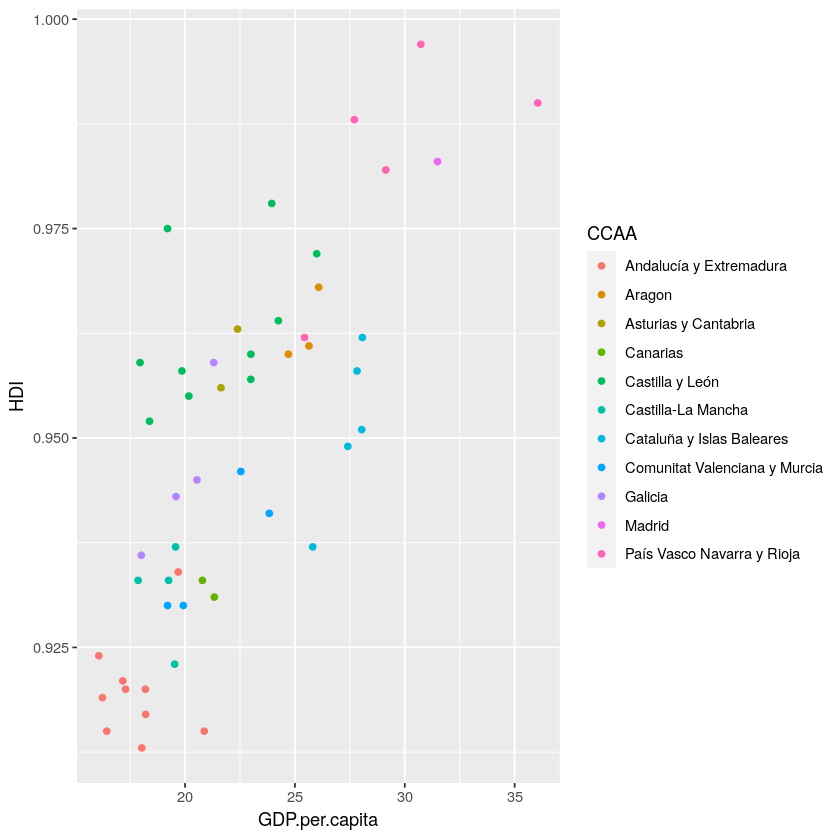

In [5]:
# Scatterplot of GDP per capita and HDI
library(ggplot2)
ggplot(joined, aes(x = GDP.per.capita, y = HDI, color = CCAA)) + geom_point()

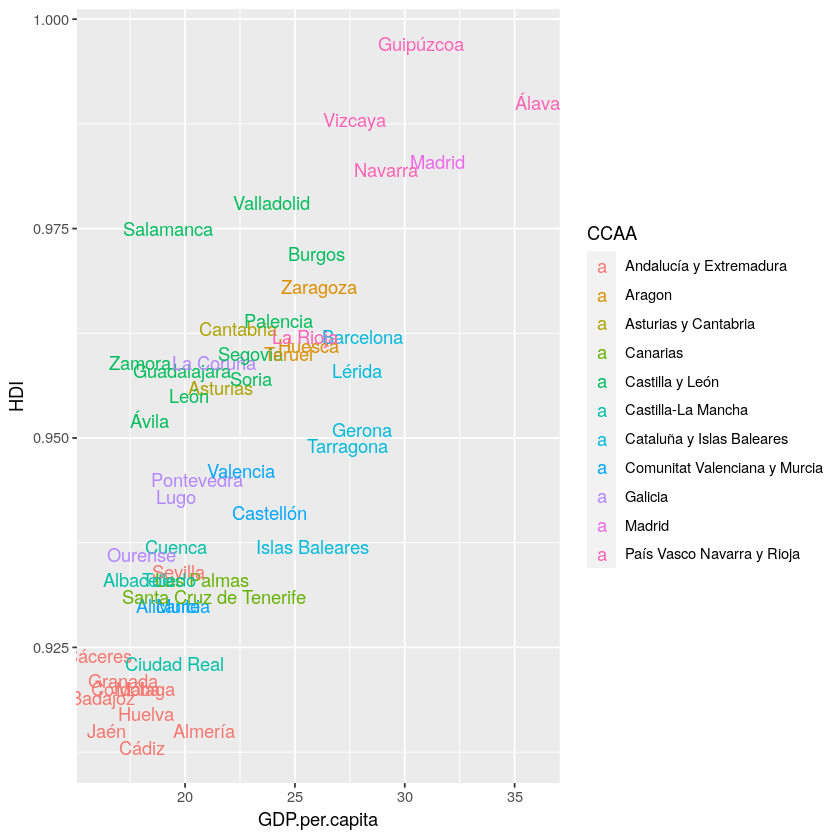

In [6]:
# Scatterplot using geom_text
ggplot(joined, aes(x = GDP.per.capita, y = HDI, color = CCAA, label = Province, check_overlap = T)) + geom_text()

In [15]:
# Calculate mean and standard deviation using aggregate
GDP_mean = aggregate(GDP.per.capita ~ CCAA, data = joined ,FUN = mean)
GDP_sd = aggregate(GDP.per.capita ~ CCAA, data = joined ,FUN = sd)
HDI_mean = aggregate(HDI ~ CCAA, data = joined ,FUN = mean)
HDI_sd = aggregate(HDI ~ CCAA, data = joined ,FUN = sd)
GDP_mean
HDI_sd

CCAA,GDP.per.capita
<chr>,<dbl>
Andalucía y Extremadura,17.81970
Aragon,25.47433
Asturias y Cantabria,22.01200
Canarias,21.06150
Castilla y León,21.57390
Castilla-La Mancha,19.05250
Cataluña y Islas Baleares,27.43120
Comunitat Valenciana y Murcia,21.37275
Galicia,19.86075


CCAA,HDI
<chr>,<dbl>
Andalucía y Extremadura,0.005977736
Aragon,0.004358899
Asturias y Cantabria,0.004949747
Canarias,0.001414214
Castilla y León,0.008956686
Castilla-La Mancha,0.005972158
Cataluña y Islas Baleares,0.009607289
Comunitat Valenciana y Murcia,0.008057088
Galicia,0.009639329


In [26]:
# Create a data frame with the different statistics
stats = data.frame(CCAA = GDP_mean$CCAA, 
                   GDP_mean = GDP_mean$GDP.per.capita,
                   HDI_mean = HDI_mean$HDI,
                   GDP_stdev = GDP_sd$GDP.per.capita,
                   HDI_stdev = HDI_sd$HDI)
stats

CCAA,GDP_mean,HDI_mean,GDP_stdev,HDI_stdev
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
Andalucía y Extremadura,17.81970,0.91980,1.5391112,0.005977736
Aragon,25.47433,0.96300,0.7045824,0.004358899
Asturias y Cantabria,22.01200,0.95950,0.5345727,0.004949747
Canarias,21.06150,0.93200,0.3839590,0.001414214
Castilla y León,21.57390,0.96300,2.7926986,0.008956686
Castilla-La Mancha,19.05250,0.93150,0.8047768,0.005972158
Cataluña y Islas Baleares,27.43120,0.95140,0.9434594,0.009607289
Comunitat Valenciana y Murcia,21.37275,0.93675,2.1781260,0.008057088
Galicia,19.86075,0.94575,1.4205488,0.009639329


In [27]:
# Change NAs to 0
stats[is.na(stats)] = 0
stats

CCAA,GDP_mean,HDI_mean,GDP_stdev,HDI_stdev
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
Andalucía y Extremadura,17.81970,0.91980,1.5391112,0.005977736
Aragon,25.47433,0.96300,0.7045824,0.004358899
Asturias y Cantabria,22.01200,0.95950,0.5345727,0.004949747
Canarias,21.06150,0.93200,0.3839590,0.001414214
Castilla y León,21.57390,0.96300,2.7926986,0.008956686
Castilla-La Mancha,19.05250,0.93150,0.8047768,0.005972158
Cataluña y Islas Baleares,27.43120,0.95140,0.9434594,0.009607289
Comunitat Valenciana y Murcia,21.37275,0.93675,2.1781260,0.008057088
Galicia,19.86075,0.94575,1.4205488,0.009639329


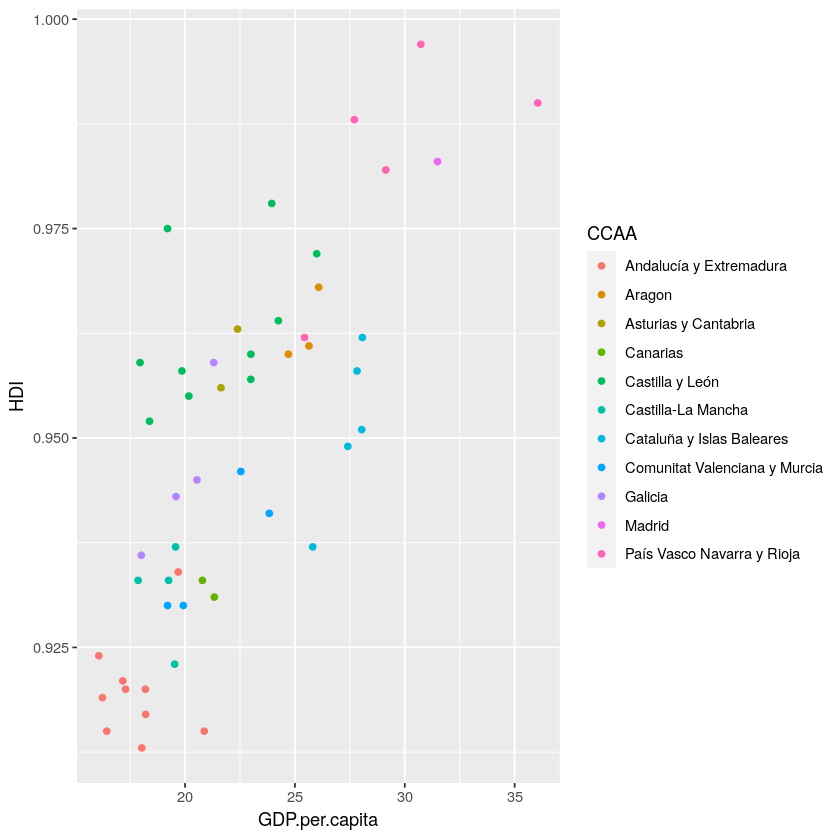

In [28]:
# Plot again the scatterplot
ggplot(joined, aes(x = GDP.per.capita, y = HDI, color = CCAA)) + geom_point()

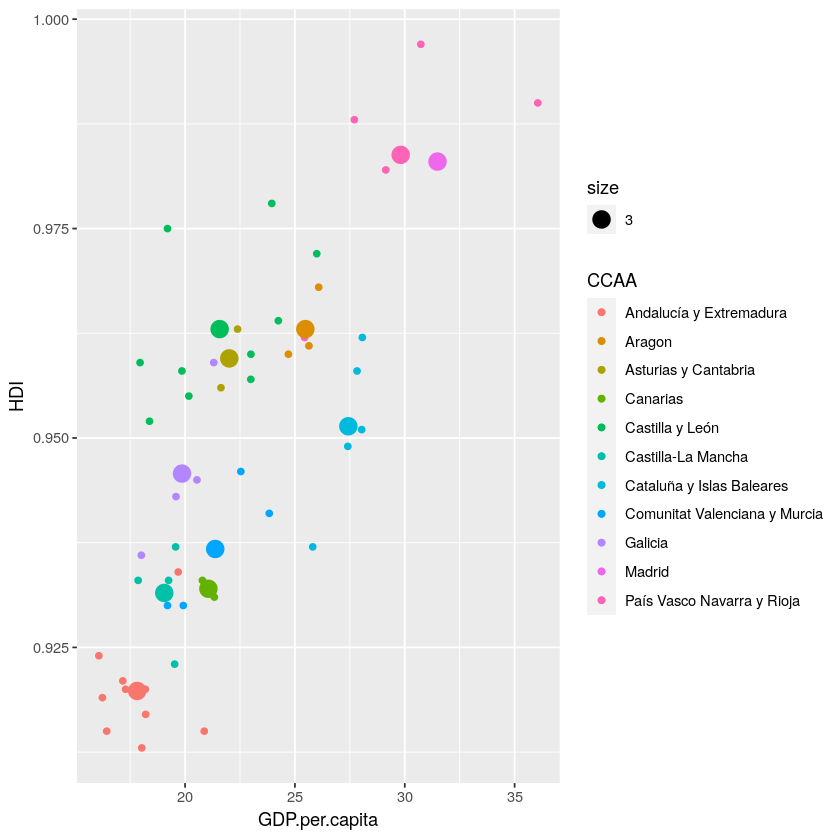

In [39]:
# Plot the mean of GDP and HDI
modified_plot = ggplot() +
    geom_point(data = joined, aes(x = GDP.per.capita, y = HDI, color = CCAA)) +
    geom_point(data = stats, aes(x = GDP_mean, y = HDI_mean, color = CCAA, size = 3)) 

modified_plot

Warning message:
“Ignoring unknown aesthetics: x”


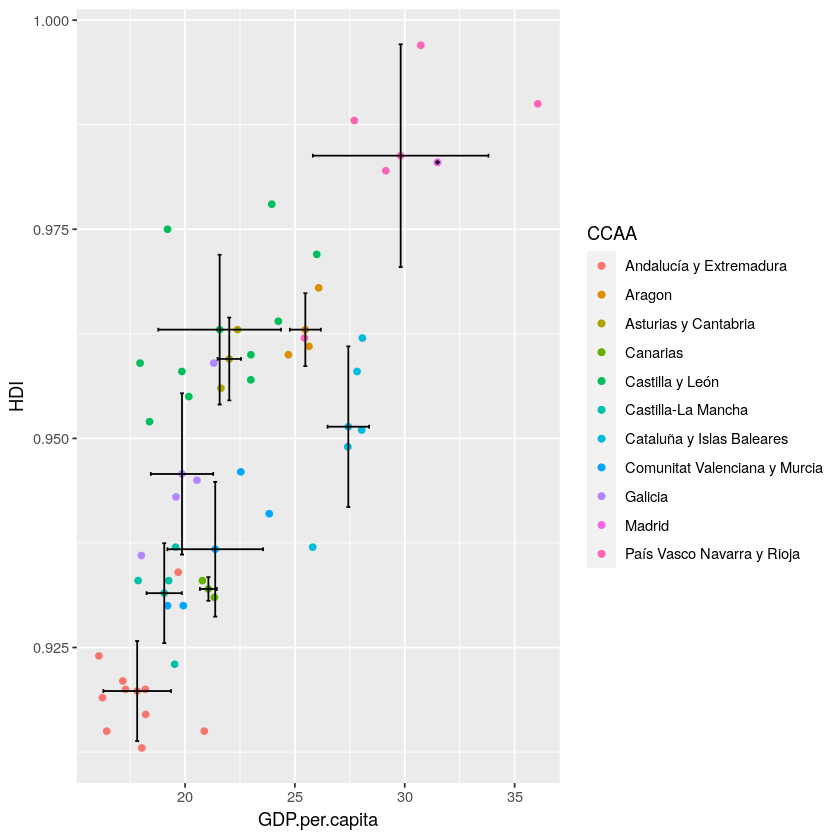

In [46]:
# Plot the mean of GDP and HDI
modified_plot = ggplot() +
    geom_point(data = joined, aes(x = GDP.per.capita, y = HDI, color = CCAA)) +
    geom_point(data = stats, aes(x = GDP_mean, y = HDI_mean, color = CCAA)) +
    geom_errorbar(data = stats, aes(x = GDP_mean, y = HDI_mean, ymin = HDI_mean - HDI_stdev, ymax = HDI_mean + HDI_stdev)) +
    geom_errorbarh(data = stats, aes(x = GDP_mean, y = HDI_mean, xmin = GDP_mean - GDP_stdev, xmax = GDP_mean + GDP_stdev))
    

modified_plot

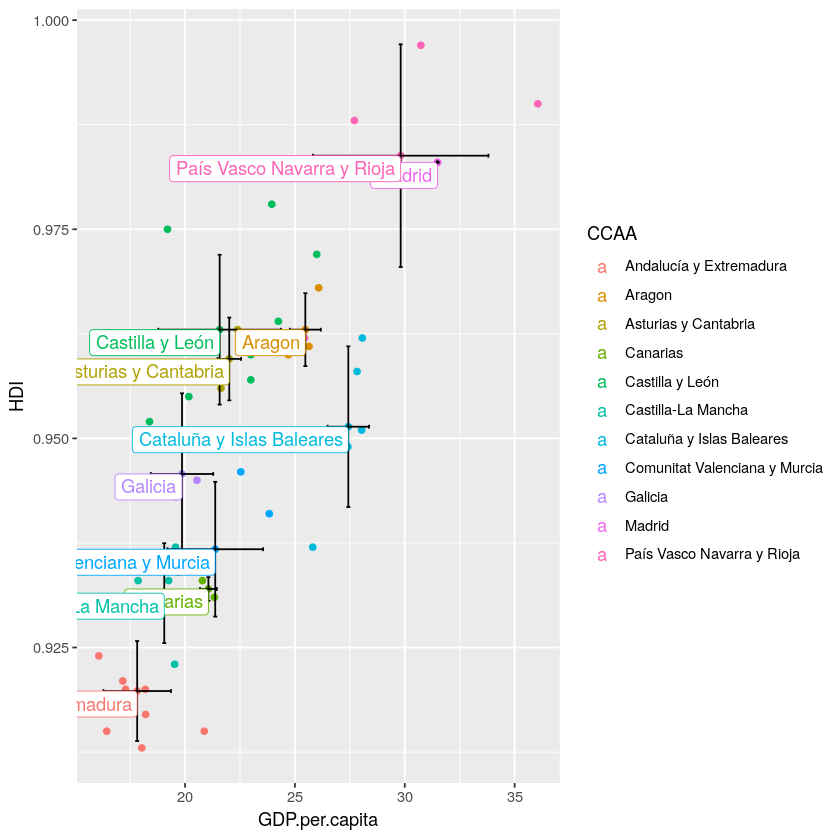

In [53]:
# Add labels
modified_plot + geom_label(data = stats, aes(x = GDP_mean, y = HDI_mean, label = CCAA, 
                color = CCAA, hjust=1, vjust=1))